# Series
[<!-- module-mm1 badge --><span class="module module-mm1">Mathematics Methods 1</span>](module-mm1) 
```{index} Series
```

In [56]:
# This cell just imports relevant modules

import numpy
from sympy import sin, cos, exp, ln, Function, Symbol, diff, integrate, limit, oo, series, factorial
from math import pi
import mpmath
import matplotlib.pyplot as plt

## Sequences

**Slide 10**

In [3]:
# Store elements of the sequence in a list
finite_sequence = [2*k for k in range(1, 5)]

print(finite_sequence)

[2, 4, 6, 8]


Remember: `range(A,B)` generates integers from `A` up to `B-1`, so we need to use `B=5` here.

### Convergence of sequences

**Slides 11, 13, 14**

In [5]:
k = Symbol('k')
print("As k->infinity, the sequence {k} tends to:", limit(k, k, oo)) 
# The 'oo' here is SymPy's notation for infinity

print("As k->infinity, the sequence {1/k} tends to:", limit(1.0/k, k, oo)) 

print("As k->infinity, the sequence {exp(1/k)} tends to:", limit(exp(1.0/k), k, oo)) 

print("As k->infinity, the sequence {(k**3 + 2*k - 4)/(k**3 + 1)} tends to:", 
      limit((k**3 + 2*k - 4)/(k**3 + 1), k, oo)) 

As k->infinity, the sequence {k} tends to: oo
As k->infinity, the sequence {1/k} tends to: 0
As k->infinity, the sequence {exp(1/k)} tends to: 1
As k->infinity, the sequence {(k**3 + 2*k - 4)/(k**3 + 1)} tends to: 1


## Series

**Slide 15**

In [21]:
# Using list comprehension:
print("The sum of 3*k + 1 (from k=0 to k=4) is:", sum([3*k + 1 for k in range(0,5)])) 
# Note: we could also use the nsum function (part of the module mpmath): 
# print(mpmath.nsum(lambda k: 3*k + 1, [0, 4]))

The sum of 3*k + 1 (from k=0 to k=4) is: 35


In [22]:
x = 1
print(f"The sum of (x**k)/(k!) from k=0 to k=4, with x = {x}, is:", 
      sum([x**k/factorial(k) for k in range(1,5)])) 

The sum of (x**k)/(k!) from k=0 to k=4, with x = 1, is: 41/24


### Arithmetic progression

**Slide 18**

In [23]:
print("The sum of 5 + 4*k up to the 11th term (i.e. up to k=10) is:", 
      sum([5 + 4*k for k in range(0,11)])) 

The sum of 5 + 4*k up to the 11th term (i.e. up to k=10) is: 275


### Geometric progression

**Slide 21**

In [24]:
print("The sum of 3**k up to the 7th term (i.e. up to k=6) is:", 
      sum([3**k for k in range(0,7)])) 

The sum of 3**k up to the 7th term (i.e. up to k=6) is: 1093


### Infinite series

**Slides 23, 24, 25**

In [25]:
print("The sum of the infinite series sum(1/(2**k)) is:", 
      mpmath.nsum(lambda k: 1/(2**k), [1, mpmath.inf]))  
print("The sum of the infinite alternating series sum(((-1)**(k+1))/k) is:", 
      mpmath.nsum(lambda k: ((-1)**(k+1))/k, [1, mpmath.inf])) 

The sum of the infinite series sum(1/(2**k)) is: 1.0
The sum of the infinite alternating series sum(((-1)**(k+1))/k) is: 0.693147180559945


### Ratio test

**Slide 27**

A diverging example:

In [30]:
k = Symbol('k')
f = (2**k)/(3*k)
f1 = (2**(k+1))/(3*(k+1))
ratio = f1/f

lim = limit(ratio, k, oo) 
print("As k -> infinity, the ratio tends to:", lim) 
if(lim < 1.0):
    print("The series converges") 
elif(lim > 1.0):
    print("The series diverges") 
else:
    print("The series either converges or diverges") 

As k -> infinity, the ratio tends to: 2
The series diverges


A converging example:

In [31]:
f = (2**k)/(5**k)
f1 = (2**(k+1))/(5**(k+1))
ratio = f1/f

lim = limit(ratio, k, oo) 
print("As k -> infinity, the ratio tends to:", lim) 
if(lim < 1.0):
    print("The series converges") 
elif(lim > 1.0):
    print("The series diverges") 
else:
    print("The series either converges or diverges") 

As k -> infinity, the ratio tends to: 2/5
The series converges


### Power series

**Slide 30**

In [35]:
k = Symbol('k')
x = Symbol('x')

a = 1/k
f = a*(x**k)

a1 = 1/(k+1)
f1 = a1*(x**(k+1))

ratio = abs(a/a1)
R = limit(ratio, k, oo)
print("The radius of convergence (denoted R) is:", R) 

x = 0.5
if(abs(x) < 1):
    print(f"The series converges for |x| = {abs(x)} (< R)") 
elif(abs(x) > 1):
    print(f"The series diverges for |x| = {abs(x)} (> R)") 
else:
    print(f"The series either converges or diverges for |x| = {abs(x)} (== R)\n") 

The radius of convergence (denoted R) is: 1
The series converges for |x| = 0.5 (< R)


## Useful series

**Slide 34**

In [11]:
x = Symbol('x')
r = Symbol('r')

# Note: the optional argument 'n' allows us to truncate the series
# after a certain order of x has been reached.
print("1/(1+x) = ", series(1.0/(1.0+x), x, n=4)) 
print("1/(1-x) = ", series(1.0/(1.0-x), x, n=4)) 
print("ln(1+x) = ", series(ln(1.0+x), x, n=4)) 
print("exp(x) = ", series(exp(x), x, n=4)) 
print("cos(x) = ", series(cos(x), x, n=7)) 
print("sin(x) = ", series(sin(x), x, n=8)) 

1/(1+x) =  1.0 - 1.0*x + 1.0*x**2 - 1.0*x**3 + O(x**4)
1/(1-x) =  1.0 + 1.0*x + 1.0*x**2 + 1.0*x**3 + O(x**4)
ln(1+x) =  1.0*x - 0.5*x**2 + 0.333333333333333*x**3 + O(x**4)
exp(x) =  1 + x + x**2/2 + x**3/6 + O(x**4)
cos(x) =  1 - x**2/2 + x**4/24 - x**6/720 + O(x**7)
sin(x) =  x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)


### Taylor series

The more terms there are in the series the more accurate it is as it better approximates the function. The error of the Taylor series decreases as \\(x\\) approaches \\(0\\).

#### \\( \ln(1+x) \\) with different number of terms \\(n\\):

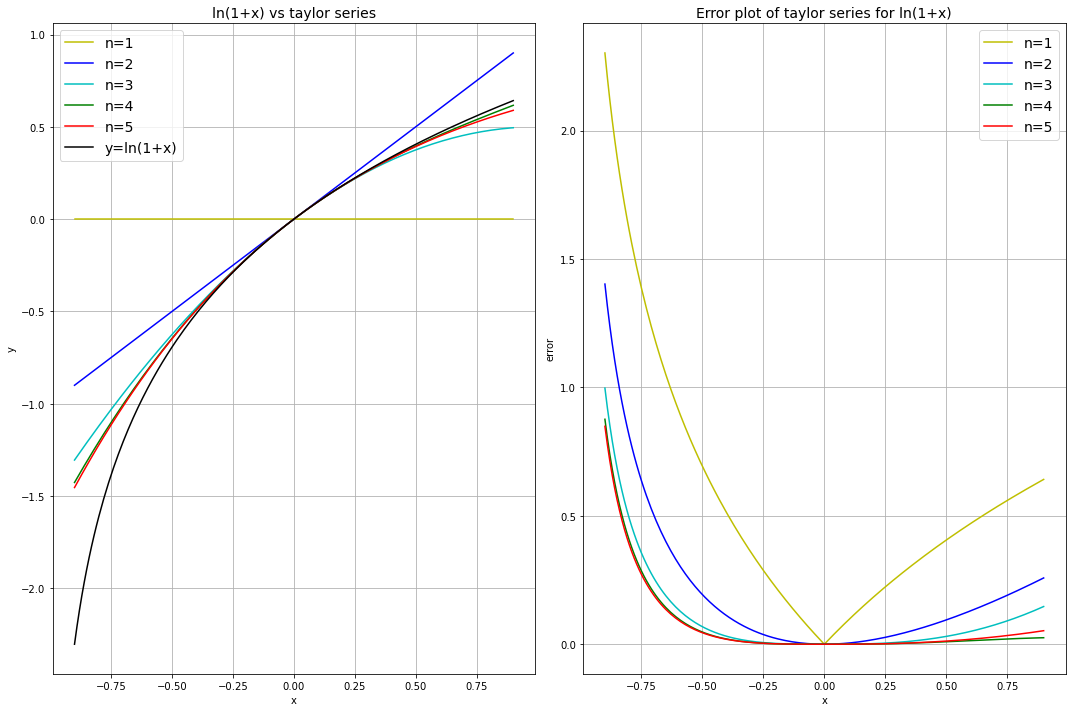

In [84]:
def ln_taylor(x, n):
    y = numpy.zeros(x.shape)
    for i in range(1, n):
        y = y + (-1)**(i+1) * (x**i)/(factorial(i))  # taylor series of ln(1+x)
    return y 


x = numpy.linspace(-0.9, 0.9, 181)  # [-0.9, -0.89, ..., 0.88, 0.89, 0.9]

ln = numpy.log(1+x)  # actual function

n = [i for i in range(1, 6)]  # list [1, 2, 3, 4, 5]
colour = ['y', 'b', 'c', 'g', 'r']           

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

for i in range(len(n)):
    y_ln = ln_taylor(x, n[i])  # values from taylor series
    ln_error = abs(y_ln - ln)  # difference between taylor series and function
    
    ax[0].plot(x, y_ln, colour[i], label=f'n={n[i]}')
    ax[1].plot(x, ln_error, colour[i], label=f'n={n[i]}')

ax[0].plot(x, ln, 'k', label='y=ln(1+x)')

ax[0].set_ylabel('y')
ax[0].set_title('ln(1+x) vs taylor series', fontsize=14)
ax[1].set_ylabel('error')
ax[1].set_title('Error plot of taylor series for ln(1+x)', fontsize=14)               
for i in range(len(ax)):
    ax[i].set_xlabel('x')
    ax[i].legend(loc='best', fontsize=14)
    ax[i].grid(True)

fig.tight_layout()
plt.show()

#### \\( \exp(x) \\) with different number of terms \\(n\\)

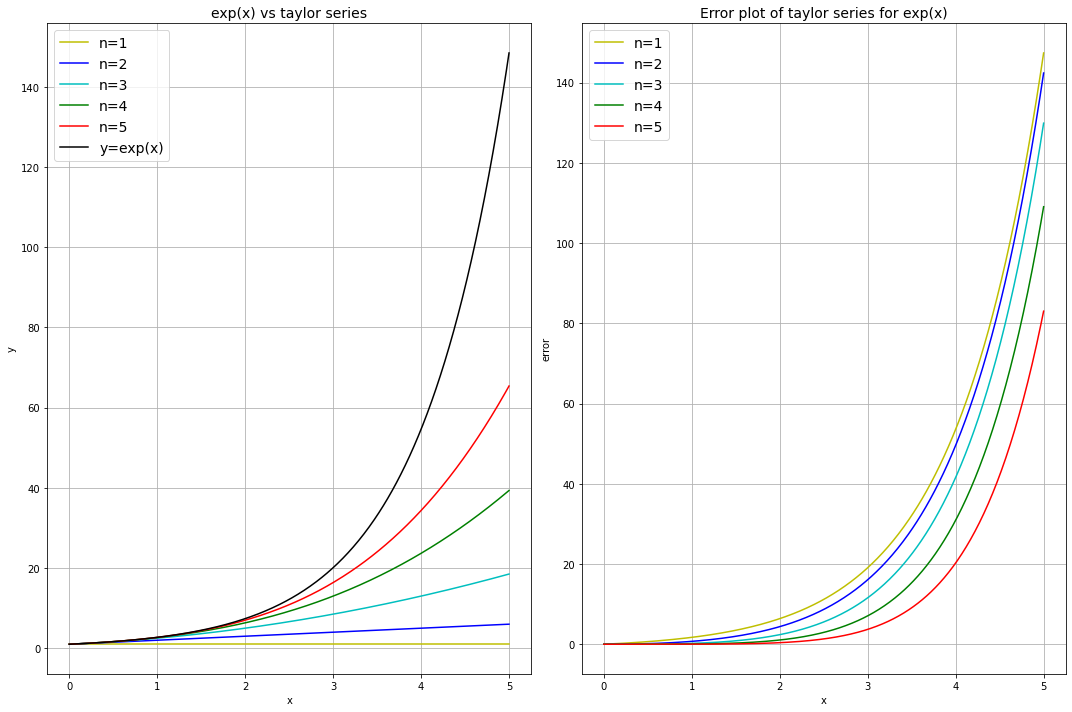

In [87]:
def exp_taylor(x, n):
    y = numpy.zeros(x.shape)
    for i in range(n):
        y = y + x**i / factorial(i)  # taylor series for exp(x)
    return y


x = numpy.linspace(0, 5, 501)  # x between 0 and 5

expx = numpy.exp(x)  # actual function

n = [1, 2, 3, 4, 5]  # number of terms between 1 and 5
colour = ['y', 'b', 'c', 'g', 'r']           

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

for i in range(len(n)):
    y_exp = exp_taylor(x, n[i])  # values from taylor series
    exp_error = abs(y_exp - expx)  # difference between taylor series and function
    
    ax[0].plot(x, y_exp, colour[i], label=f'n={n[i]}')
    ax[1].plot(x, exp_error, colour[i], label=f'n={n[i]}')

ax[0].plot(x, expx, 'k', label='y=exp(x)')

ax[0].set_ylabel('y')
ax[0].set_title('exp(x) vs taylor series', fontsize=14)
ax[1].set_ylabel('error')
ax[1].set_title('Error plot of taylor series for exp(x)', fontsize=14)               
for i in range(len(ax)):
    ax[i].set_xlabel('x')
    ax[i].legend(loc='best', fontsize=14)
    ax[i].grid(True)

fig.tight_layout()
plt.show()

#### \\( \sin(x) \\) with different number of terms \\(n\\)

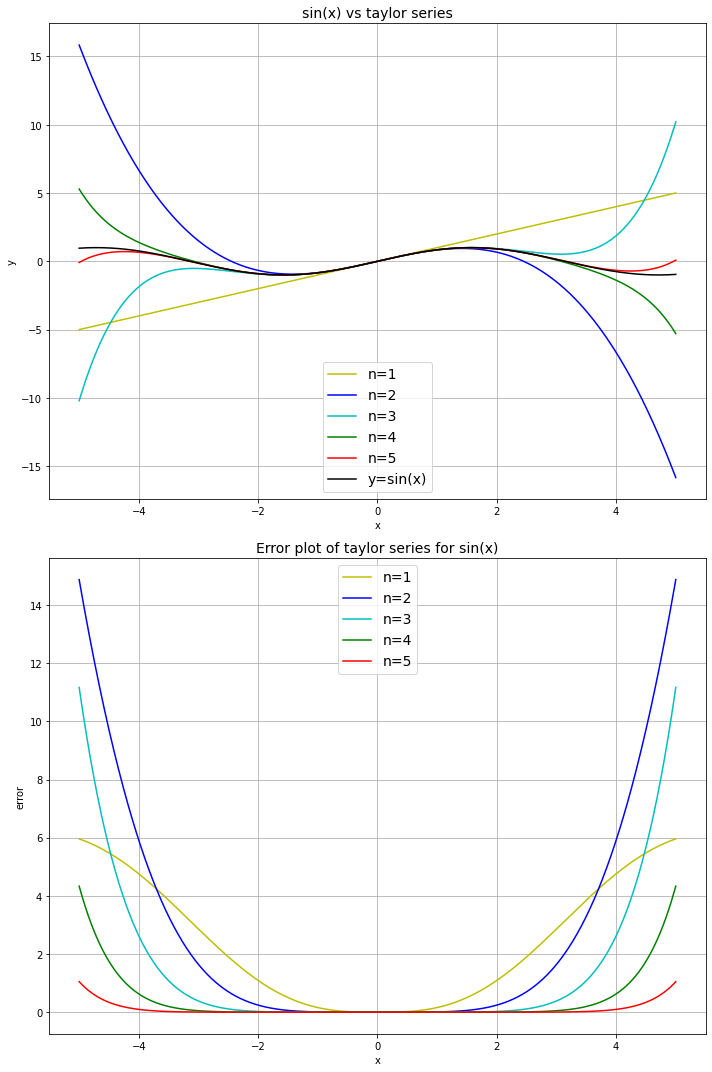

In [91]:
def sin_taylor(x, n):
    y = numpy.zeros(x.shape)
    for i in range(n):
        y = y + (-1)**(i)*(x**(2*i+1) / factorial(2*i+1)) # taylor series for sin(x)
    return y

x = numpy.linspace(-5, 5, 1001)  # x between -5 and 5

sinx = numpy.sin(x) # actual function

n = [1, 2, 3, 4, 5]  # number of terms between 1 and 5
colour = ['y', 'b', 'c', 'g', 'r']                     

fig, ax = plt.subplots(2, 1, figsize=(10, 15))

for i in range(len(n)):
    y_sin = sin_taylor(x, n[i])  # values from taylor series
    sin_error = abs(y_sin - sinx)  # difference between taylor series and function
    
    ax[0].plot(x, y_sin, colour[i], label=f'n={n[i]}')
    ax[1].plot(x, sin_error, colour[i], label=f'n={n[i]}')

ax[0].plot(x, sinx, 'k', label='y=sin(x)')

ax[0].set_ylabel('y')
ax[0].set_title('sin(x) vs taylor series', fontsize=14)
ax[1].set_ylabel('error')
ax[1].set_title('Error plot of taylor series for sin(x)', fontsize=14)               
for i in range(len(ax)):
    ax[i].set_xlabel('x')
    ax[i].legend(loc='best', fontsize=14)
    ax[i].grid(True)

fig.tight_layout()
plt.show()